In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay

In [2]:
x_resampled=pd.read_csv('resampled_without_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')
min_max_scale_data=pd.read_csv('min_max_resampled_with_encoding.csv')

## Modelling

### Data with Resampling and without OneHotEncoding

In [3]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test1,y_train,y_test1=train_test_split(X,Y,test_size=0.2,random_state=10)

In [4]:
model=RandomForestClassifier(random_state=48)

start_time = timeit.default_timer()
model.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
y_pred1=model.predict(X_test1)
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  379.667682


In [6]:
print(f"Accuracy score:{accuracy_score(y_test1, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test1, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test1, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test1, y_pred1):.4f}")

Accuracy score:0.9779
F1 score : 0.9775
Recall score : 0.9598
Precision score : 0.9959


<AxesSubplot:>

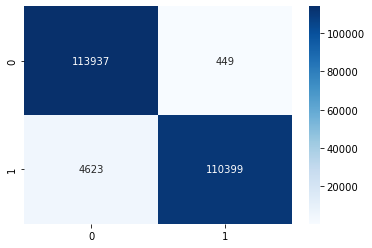

In [10]:
sns.heatmap(confusion_matrix(y_test1,y_pred1),annot=True,fmt='', cmap='Blues')

In [8]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114386
           1       1.00      0.96      0.98    115022

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



### Data with Resampling and with OneHotEncoding

In [11]:
X = min_max_scale_data.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [12]:
model=RandomForestClassifier(random_state=48)
start_time = timeit.default_timer()
model.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
y_pred1=model.predict(X_test)
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  431.1879317999999


In [13]:
print(f"Accuracy score:{accuracy_score(y_test, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred1):.4f}")

Accuracy score:0.9773
F1 score : 0.9769
Recall score : 0.9599
Precision score : 0.9945


In [14]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 48,
 'verbose': 0,
 'warm_start': False}

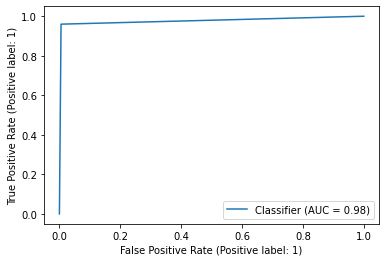

In [17]:
RocCurveDisplay.from_predictions(y_test, y_pred1)

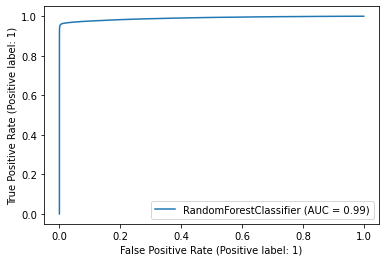

In [19]:
RocCurveDisplay.from_estimator(model,X_test,y_test)

In [32]:
rf_reg = RandomForestClassifier(random_state=48)

start_time = timeit.default_timer()
rf_reg.fit(X_train,y_train)
#perform k fold

cv_r2_scores_rf = cross_val_score(rf_reg, X, Y, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

elapsed = timeit.default_timer() - start_time
print(elapsed)

[0.61727577 0.98066319 0.97996574 0.98088986 0.98001805]
Mean 5-Fold R Squared: 0.9077625205193278
2639.3376154


* We see that the metrics for all folds in cross_val_score are uniform so it can be concluded that the model is able to generalise
* As 4 subsets gave accuracy of 98 we can conside the above model result is not overfitting

#### There is same accuracy with and without OneHotEncoding

### Hyperparameter tuning

* Hyperparameter tuning can be advantageous in creating a model that is better at classification. 
* In the case of a random forest, it may not be necessary, as random forests are already very good at classification. 
* Using exhaustive grid search to choose hyperparameter values can be very time consuming as well.
* However, in cases where there are only a few potential values for your hyperparameters or when your initial classification model isn’t very accurate, it might be a good idea to at least investigate the effect of changing some of the hyperparameter values in your model.

### As there is high accuracy it may not necessary to do hyperparameter tuning

https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6#:~:text=Hyperparameter%20tuning%20can%20be%20advantageous%20in%20creating%20a,values%20can%20be%20very%20time%20consuming%20as%20well.